In [1]:
from em_code import *
import matplotlib.pyplot as plt
from tqdm.autonotebook  import tqdm

In [2]:
nClusters = 5
nStates= 5
tt,qq=generateChains(nStates, nClusters) # randomly generate chains
mixtureProbs = np.repeat(1/nClusters, nClusters)  # uniform for now
N=100 # number of trajectories
T=50 # number of time pts
tol=1e-12 # EM stopping condition

In [3]:
Xt, trueLabels = generateTrajectories(N,T, mixtureProbs, qq,tt, nClusters) # sample 

In [4]:
nTrials = 25 # just repeat with different EM initial conditions only randomness 

In [5]:
zMeanErrs = np.zeros(nTrials,) # store stuff, yada yada 
zEsts = np.zeros([nTrials,N,nClusters]) 
muEsts = np.zeros([nTrials, nClusters])
qEsts = np.zeros([nTrials, nClusters,nStates])
pEsts = np.zeros([nTrials, nClusters,nStates,nStates])
emSteps = np.zeros(nTrials,)


In [6]:
# repeat these trials, only difference is EM initial random condition
for s in  tqdm (range (nTrials), desc="running..."):
    zHat, muHat, qHat, pHat,steps = doEM(Xt, nClusters, nStates, tol)
    best_assignment, zHat_c, qHat_c, muHat_c, pHat_c= find_best_clustermatch(trueLabels, zHat, muHat, qHat, pHat)
    zHatTrue=make_zHatTrue(trueLabels,nClusters)
    diffZhat = np.linalg.norm(zHatTrue-zHat_c,axis=1,ord=2)
    zMeanErrs[s] = np.mean(diffZhat)
    #print(s) 

    zEsts[s,:,:] = zHat_c
    muEsts[s,:] = muHat_c
    qEsts[s,:,:] = qHat_c
    pEsts[s,:,:,:] = pHat_c
    emSteps[s] = steps

running...: 100%|██████████| 25/25 [04:55<00:00, 11.81s/it]


(array([18.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.03248283, 0.06875687, 0.10503092, 0.14130496, 0.177579  ,
        0.21385304, 0.25012708, 0.28640112, 0.32267516, 0.35894921,
        0.39522325]),
 <BarContainer object of 10 artists>)

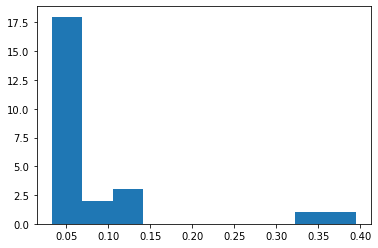

In [7]:
plt.hist(zMeanErrs)

In [ ]:
# this looks... worse than expected... there is just a couple but a couple go VERY bad because of their initial condition... 

(array([6., 1., 1., 1., 1., 2., 2., 7., 3., 1.]),
 array([29., 34., 39., 44., 49., 54., 59., 64., 69., 74., 79.]),
 <BarContainer object of 10 artists>)

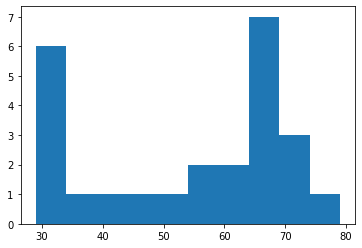

In [8]:
plt.hist(emSteps) # a bit of spread here but this seems ok

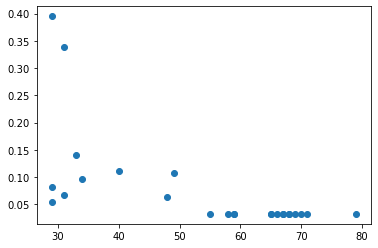

In [9]:
plt.scatter(emSteps,zMeanErrs) # hopefully no real correlation here... but there seems to be. the "bad" ones seem to get stuck. Maybe this means I need to lower EM tolerance dramatically?

In [12]:
really_bad_index = np.argmax(zMeanErrs)
really_bad_index

17

In [14]:
muEsts[really_bad_index,:] # pretty close but not amazing parameter estimates even if it classifies individual trajectories not so good

array([0.19999837, 0.08986656, 0.37064116, 0.11931372, 0.22018019])